# Preámbulo

In [1]:
# Módulo de economía ambiental #
import EcoAmb as EA 

# Gráficos y estilo #
import matplotlib.pyplot as plt
import matplotlib.patches as mpl_patches
from mpl_toolkits.mplot3d import Axes3D # perspectiva 3d
from matplotlib import cm # mapas de colores
plt.style.use('seaborn-whitegrid') # estilo de gráficos

# Módulo de arreglos y vectores
import numpy as np

# Gráficos interactivos  #
from ipywidgets import interact, fixed # Para hacer gráficos interactivos

# Ignorar advertencias 
import warnings
warnings.filterwarnings("ignore")

# Recargar módulo automáticamente
%load_ext autoreload
%autoreload 2

# Mercado sin distorsiones

Con la función de demanda sabemos cuánto se demandará del bien dado un precio. Del mismo modo, la función de oferta nos permite saber cuánto se ofrecerá del bien dado un precio. 

Con lo anterior, cabe preguntarse si existe un precio $P^*$ tal que la cantidad demandada y la cantidad ofrecida sean iguales (es decir, $Q^s(P^*) = Q^d(P^*) = Q^*$). Si este par $(Q^*,P^*)$ existe, diremos que el mercado se equilibra en $(Q^*,P^*)$.


Recordemos que si los consumidores están maximizando su utilidad y las empresas su beneficio se cumple que

$$
\begin{aligned}
\frac{\mbox{Umg}_x}{\mbox{Umg}_y} = \frac{P_x}{P_y} = \frac{\mbox{Cmg}_x}{\mbox{Cmg}_y}
\end{aligned}
$$


Veremos que este equilibrio maximiza, bajo ciertas condiciones, el bienestar agregado de la economía.

Para medir este bienestar usaremos, por simplicidad, la suma del excedente del consumidor y del productor.

Para calcular el excedente del consumidor debemos calcular la diferencia entre la disposición 
a pagar por las $Q^*$ unidades consumidas y el precio pagado por ellas, $P^*Q^*$.

$$
\begin{aligned}EC = \int_0^{Q^*}P^d(Q)dQ -P^*Q^*\end{aligned}
$$

Para el excedente del productor debemos calcular la diferencia entre el ingreso $P^*Q^*$ y el costo de producir 
$Q^*$ unidades.

$$
EP = P^*Q^* - \int_0^{Q^*}\mbox{Cmg}(Q)dQ
$$

**Ejemplo:**
    
Oferta: $P^s(Q) = Q^2$

Demanda: $P^d(Q) = \frac{1}{2(Q+0.1)}$

Equilibrio: encontrar $Q^*$ tal que 

$P^s(Q^*) = P^d(Q^*)$

Cantidad producida = 0.7617279755938333 

Precio = 0.5802295088022881 

Excedente del consumidor = 0.6349076815376045 

Excedente del productor = 0.29465136607984965 

Excedente total =  0.9295590476174541 



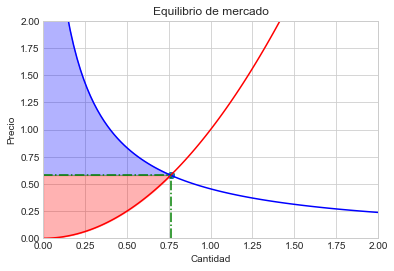

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import EcoAmb as EA

def P_d(Q):
    return 0.5/(Q+0.1)
def P_s(Q):
    return Q**2

Mercado_1 = EA.Market(P_d,P_s)
Mercado_1.Qmax = 2
Mercado_1.Pmax = 2

Mercado_1.ts = 0#-0.5
Mercado_1.td = 0
Mercado_1.Plot_Equilibrio(mostrar_excedente = True)
                        #mostrar_EC = True, mostrar_EP = True,
                         #mostrar_Gasto = True)
print('Cantidad producida =', Mercado_1.Equilibrio()[0],'\n')
print('Precio =', Mercado_1.Equilibrio()[1],'\n')
print('Excedente del consumidor =',Mercado_1.Ex_C(),'\n')
print('Excedente del productor =',Mercado_1.Ex_P(),'\n')
print('Excedente total = ',Mercado_1.Ex_C() +Mercado_1.Ex_P(),'\n')

# Mercado con distorsiones

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import EcoAmb as EA

def P_d(Q):
    return 0.5/(Q+0.1)
def P_s(Q):
    return Q**2

Mercado_2 = EA.Market(P_d,P_s)

## Impuesto a la oferta

<p>Ahora consideramos un impuesto a la oferta $\tau$. Esto quiere decir que cada unidad, además de 
costar el costo marginal correspondiente, cuesta $\tau$ unidades monetarias extra.</p>
<p>En consecuencia, esto es equivalente a que el costo de la producción aumente y la oferta se reduzca.</p>

<strong>Ejemplo:</strong>

<p>Sigamos con el ejemplo anterior, pero consideremos un impuesto a la oferta igual a $0.5$.</p>

Oferta: $P^s(Q) = Q^2$

Demanda: $P^d(Q) = \frac{1}{2(Q+0.1)}$

Impuesto: $\tau = 0.5$

Equilibrio: Encontrar $\tilde{Q}$ tal que

$P^d(\tilde{Q}) = P^s(\tilde{Q}) + \tau$

Cantidad producida = 0.5355094460641734 

Precio = 0.786770366823958 

Excedente del consumidor = 0.5033054209417125 

Excedente del productor = 0.10237882685701172 

Excedente total =  0.8734389708308109 



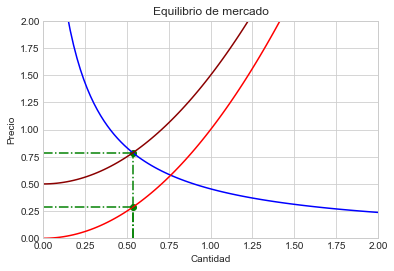

In [9]:
Mercado_2.ts = 0.5 # Impuesto de 0.5

Mercado_2.Plot_Equilibrio(mostrar_EC = False)
                        #mostrar_EC = True, mostrar_EP = True,
                         #mostrar_Gasto = True)
plt.plot()

print('Cantidad producida =', Mercado_2.Equilibrio()[0],'\n')
print('Precio =', Mercado_2.Equilibrio()[1],'\n')
print('Excedente del consumidor =',Mercado_2.Ex_C(),'\n')
print('Excedente del productor =',Mercado_2.Ex_P(),'\n')
print('Excedente total = ',Mercado_2.Ex_C() +Mercado_2.Ex_P() +
      sum(Mercado_2.Tax_Payment()),'\n')

<p>La <em>nueva oferta</em> corresponde a la curva de color rojo oscuro. Vemos que la cantidad de equilibrio ahora es menor en comparación con el caso sin impuesto, pasando de $0.76$ a $0.5$. El precio sube desde $0.58$ a $0.76$. </p>

### Excedente del consumidor

Parece evidente que el excedente del consumidor disminuye, ya que el precio final aumenta, así como la cantidad consumida disminuye. En efecto, eso vemos en el gráfico.


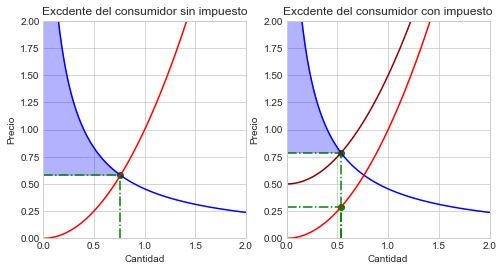

In [11]:
fig = plt.figure(figsize=(8, 4))
plt.subplots_adjust(hspace = 0.6 )
fig.add_subplot(121)
Mercado_1.Plot_Equilibrio(mostrar_EC = True, titulo = 'Excdente del consumidor sin impuesto')
fig.add_subplot(122)
Mercado_2.Plot_Equilibrio(mostrar_EC= True, titulo = 'Excdente del consumidor con impuesto')

### Excedente del productor

<p>En el caso del productor también parece claro que este estará peor. Recordemos que si bien el precio de mercado  es mayor esto es porque el costo de producción es más alto (producto del impuesto).</p>

<p>Para encontrar el excedente del productor debemos considerar que el precio real que percibe el productor es
el precio de mercado menos el impuesto ($\tilde{P}-\tau$).</p> 

<p> Luego, el excedente es </p>
$$EP = \left(\tilde{P}-\tau \right)\tilde{Q} -\int_0^{\tilde{Q}}\mbox{Cmg}(q)dq$$

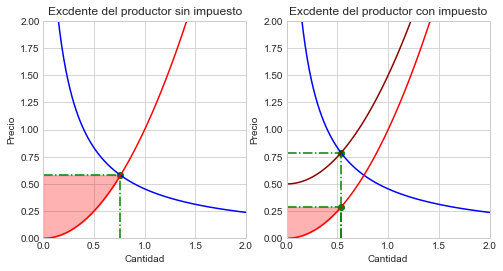

In [12]:
fig = plt.figure(figsize=(8, 4))
plt.subplots_adjust(hspace = 0.6 )
fig.add_subplot(121)
Mercado_1.Plot_Equilibrio(mostrar_EP = True, titulo = 'Excdente del productor sin impuesto')
fig.add_subplot(122)
Mercado_2.Plot_Equilibrio(mostrar_EP = True, titulo = 'Excdente del productor con impuesto')

### Ingreso del gobierno y excedente total

<p>Si bien tanto el productor como el consumidor empeoran su condición, el gobierno obtiene un ingreso igual
a $\tau \cdot \tilde{Q}$.</p>

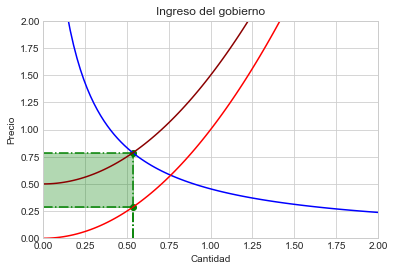

In [13]:
Mercado_2.Plot_Equilibrio( mostrar_Gasto = True, titulo = 'Ingreso del gobierno')

<p>La pregunta es, entonces, si el ingreso que obtiene el gobierno compensa la pérdida de consumidores y productores.</p>

$$ET = EP + EC + IG$$

$$ET = \left((\tilde{P}-\tau)\tilde{Q} -\int_0^{\tilde{Q}}\mbox{Cmg}(q)dq \right)+ \left(\int_0^{\tilde{Q}}P^d(q)dq - \tilde{P}\tilde{Q}\right) + \tau \tilde{Q}$$

$$ET = \int_0^{\tilde{Q}} \left(P^d(q) - \mbox{Cmg}(q) \right)dq$$
<p>En primer lugar, vemos que el ingreso del gobierno es exactamente igual al pago del productor. Por lo tanto, nos olvidamos del monto del impuesto a la hora de calcular el efecto total. Luego, el efecto del impuesto dependerá solamente del efecto distorsionador sobre la cantidad <strong>consumida en este mercado</strong>. En otras palabras, de cuánto nos alejamos de $Q^*$.</p>

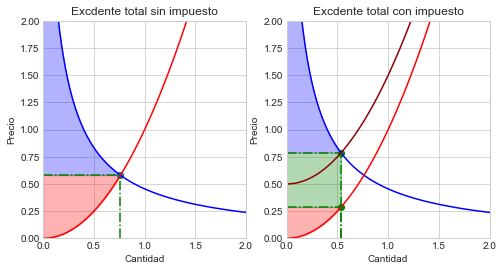

In [14]:
fig = plt.figure(figsize=(8, 4))
plt.subplots_adjust(hspace = 0.6 )
fig.add_subplot(121)
Mercado_1.Plot_Equilibrio(mostrar_excedente = True, titulo = r'Excdente total sin impuesto')
fig.add_subplot(122)
Mercado_2.Plot_Equilibrio(mostrar_EC= True, mostrar_EP = True, mostrar_Gasto = True, 
                          titulo =r'Excdente total con impuesto')


<p>Luego, vemos que hay una pérdida de excedente total.</p>

$$DWL = \int_{\tilde{Q}}^{Q^*}\left( P^d(q) -\mbox{Cmg}(q) \right)dq$$

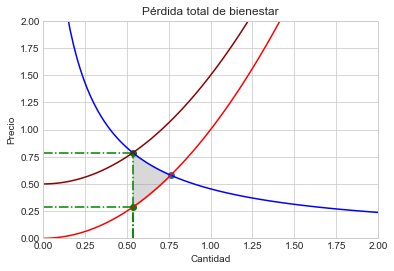

In [15]:
Mercado_2.Plot_Equilibrio(mostrar_DWL = True, titulo = r'Pérdida total de bienestar')

## Mercado con subsidio

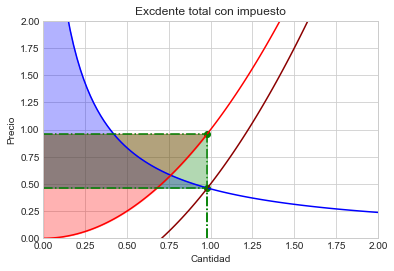

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import EcoAmb as EA

def P_d(Q):
    return 0.5/(Q+0.1)
def P_s(Q):
    return Q**2

Mercado_2 = EA.Market(P_d,P_s)

Mercado_2.ts = -0.5 # Impuesto de 0.5

Mercado_2.Plot_Equilibrio(mostrar_EC= True, mostrar_EP = True, mostrar_Gasto = True, 
                          titulo =r'Excdente total con impuesto')


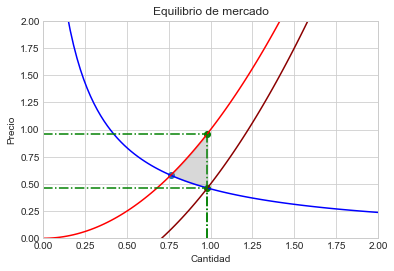

In [9]:
Mercado_2.Plot_Equilibrio(mostrar_DWL = True)

## Mercado con precio máximo

<p>¿Qué pasa si en lugar de un subsidio ponemos un precio máximo?</p>
<p>Si el precio máximo está por está por debajo del precio de equilibrio, tendremos dos efectos.
En primer lugar, la demanda por el bien aumenta (ya que el precio disminuye). Por otra parte, la 
oferta disminuye (ya que el precio disminuye y hemos supuesto costos marginales crecientes)</p>
<p>Estos dos efectos opuestos generan una menor cantidad producida y un exceso de demanda. Evidentemente, el excedente total de la economía se reduce.</p>


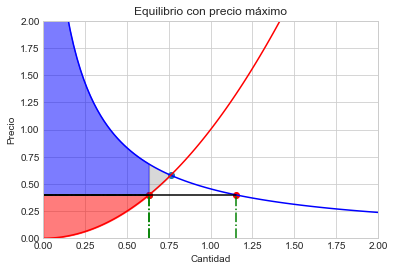

In [33]:
import EcoAmb as EA
def P_d(Q):
    return 0.5/(Q+0.1)
def P_s(Q):
    return Q**2

Mercado_2 = EA.Market(P_d,P_s)
Mercado_2.Pr = 0.4
Mercado_2.Plot_Equilibrio(mostrar_excedente = False,
                         mostrar_EC = True,
                         mostrar_EP = True,
                         mostrar_DWL = True,
                         titulo = r'Equilibrio con precio máximo')

ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

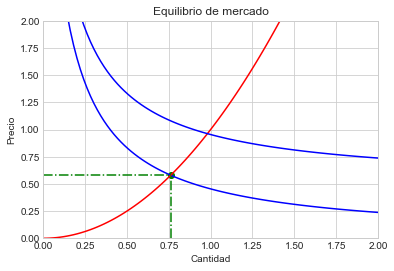

In [24]:
""""Mercado_2.ts = 0
Mercado_2.Pd = lambda q:Mercado_1.Pd(q) + 0.5

Mercado_1.Plot_Equilibrio()

Mercado_2.Pr = 0.58
Mercado_2.Plot_Equilibrio(mostrar_excedente = False,
                         mostrar_EC = True,
                         mostrar_EP = True,
                         mostrar_DWL = True,
                         titulo = r'Equilibrio con precio máximo')""""

Un caso que refleja lo anterior:
[Precio_mascarillas](https://www.elconfidencial.com/empresas/2020-04-20/el-anuncio-de-intervenir-precios-paraliza-la-importacion-de-mascarillas-a-espana_2557751/)

## Mercado con precio mínimo

<p>¿Qué pasa si tomamos el enfoque opuesto y ponemos un precio mínimo?</p>
<p>Si este precio está por sobre el precio de equilibrio, tendremos que la demanda por 
    el bien disminuirá (porque el precio sube), mientras que la oferta del bien aumenta (porque el precio
    sube)</p>
    
<p>Estos dos efectos opuestos genera un exceso de oferta, los productores no podrán vender todos los  productos que quisieran vender a ese precio. Finalmente, la cantidad producida en este mercado se reduce y el excedente total también cae.</p>

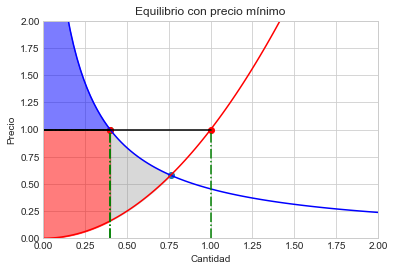

In [34]:
import EcoAmb as EA
def P_d(Q):
    return 0.5/(Q+0.1)
def P_s(Q):
    return Q**2

Mercado_2 = EA.Market(P_d,P_s, Pr_Max_Min = 'Min')
Mercado_2.Pr = 1.0
Mercado_2.Plot_Equilibrio(mostrar_excedente = False,
                         mostrar_EC = True,
                         mostrar_EP = True,
                         mostrar_DWL = True,
                         titulo = r'Equilibrio con precio mínimo')

## Algunos comentarios respecto a la regulación de precios

* Como hemos visto, si se quiere bajar el precio con el objetivo de aumentar el consumo de un bien, es posible que terminemos generando más escasez.

* De hecho, ante un aumento en la demanda es mejor dejar que el precio suba, ya que esto incentivaría la producción.

* Por el contrario, si la oferta está fija (e.g. solo hay 1000 botellas de agua en un pueblo), cualquier variación en el precio es irrelevante, por lo que el Estado sí podría fijar precios con el objetivo de mejorar la distribución.

* En términos generales, si la oferta es muy sensible a cambios no es recomendable fijar un precio. Si la oferta es poco sensible a los precios, se puede justificar por criterios de justicia.

* Sin embargo, incluso en este último caso, es posible que se ponga un precio por debajo del costo. Desincentivando la producción en este mercado.

# Eficiencia de mercado

## Intuición gráfica: Frontera de posibilidades

A continuación, mostramos un esquema que representa las posibilidades de utilidad que ofrece una economía a sus participantes. Vemos que esta curva nos permite definir tres regiones.
    
* La primera región corresponde a aquellos puntos que están por debajo de la curva. Estos puntos serán llamados **ineficientes**, ya que se podría encontrar un asignación distinta tal que ***mejore a todos los participantes de la economía***.

* La segunda región corresponde a aquellos puntos que están en la curva. Estos puntos serán llamados **eficientes**, ya que es imposible encontrar un asignación distinta tal que ***mejore a todos los participantes de la economía***.

* La última región corresponde a los puntos inalcanzables (infactibles, imposibles) dadas las condiciones actuales de una economía.


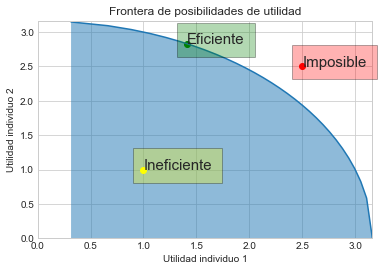

In [10]:
import EcoAmb as EA
import matplotlib.pyplot as plt
import numpy as np

FPP1 = EA.FPP()
u1 = FPP1.u1(2)
u2 = FPP1.u2(FPP1.Xmax -2)

FPP1.Plot_FPP()

EA.locate_dot(1,1, show_line = False, color = 'yellow', annotate = r'Ineficiente')

EA.locate_dot(u1,u2, show_line = False, color = 'green', annotate=r'Eficiente')

EA.locate_dot(2.5,2.5,show_line = False, color = 'red', annotate= r'Imposible')

<p>Es necesario señalar que esta curva está determinada por diversos factores. Por ejemplo, la tecnlogía, la disponibilidad de recursos, la posibilidad de realizar intercambios, entre otros. De esta forma, puntos que no son alcanzables pueden convertirse en factibles ante cambios externos.</p>

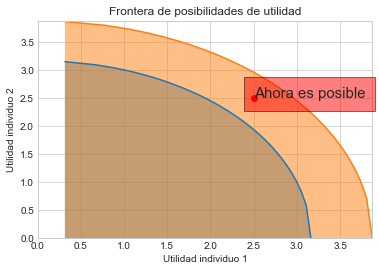

In [4]:
FPP2 = EA.FPP()
FPP2.Xmax = 15
FPP1.Plot_FPP()
FPP2.Plot_FPP()
EA.locate_dot(2.5,2.5,show_line = False, color = 'red',
              annotate = r'Ahora es posible')
#plt.annotate(r'Ahora es posible',(2.5,2.5) ,bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10},fontsize=15)

Otro punto importante que debemos recordar es que eficiencia es distinto a justicia. Una asignación completamente injusta puede ser eficiente. 

Por ejemplo, en el gráfico siguiente vemos que el individuo 1 logra la máxima utilidad posible, mientras que el 2 logra el mínimo.

**Es fundamental reconocer la diferencia entre justicia y eficiencia.**


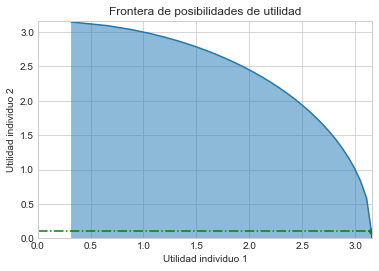

In [27]:
FPP1.Plot_FPP()
EA.locate_dot(FPP1.u1(FPP1.Xmax-0.01),FPP1.u2(0.01))


## Definción: Eficiencia en el sentido de Pareto